<a href="https://colab.research.google.com/github/dannydrinkswater/AiLearning/blob/master/Herbs_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Demo on Herbs Classification

To Build a simple herbs recognition model that can classify image into **9 different categories**.

**Types:** 化橘紅,陳皮,五加皮,肉桂,白朮,人參,西紅花,山銀花,金錢草

**Training Set:** 136 Images in total

**Validation Set:** 34 Images in total

**Testing Set:** 31 Images in total

We use top-1 performance as metrics (Only the predictions with highest confidence would be counted), and achieve 93.5% of accuracy on testing set

_Model is trained above Efficientnet under platform of keras and tensorflow_

![替代文字](http://e0.ifengimg.com/03/2019/0216/3E7DF7C64CE1B0271F2C99573781A54C95428E78_size80_w640_h427.jpeg)

# System Flow

###a. Load our pretrained model 
    
###b. Predict on the test data set to visualize our result

###c. Predict on uploaded single image

## Load our pretrained model & environment setup

In [0]:
Setup()

Library Declared
Data loaded
Found 170 validated image filenames belonging to 9 classes.
Found 31 validated image filenames.
Model loaded
Setup Finished


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:273: UserWarning: Found 1 invalid image filename(s) in x_col="file_path". These filename(s) will be ignored.
  .format(n_invalid, x_col)


## Upload Image for predictions

In [0]:
def upload_predict():
  uploaded = files.upload()
  for name, data in uploaded.items():
    predict_image(name)
    os.system("rm %s" % (name))

Saving new3.jpg to new3.jpg
Saving new1.jpg to new1.jpg
Saving image17.jpg to image17.jpg
Prediction is: 人參
Prediction is: 肉桂
Prediction is: 白朮


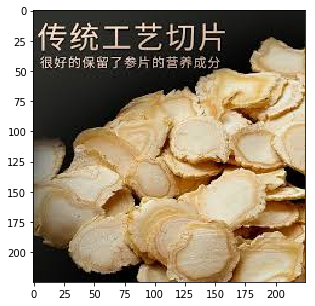

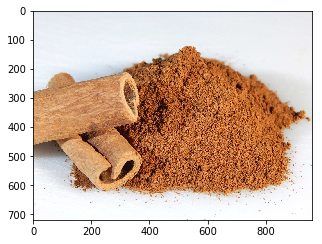

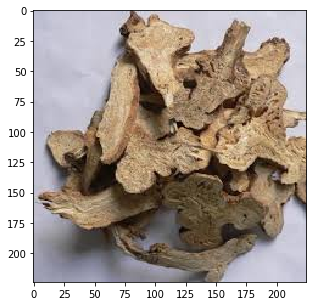

In [0]:
upload_predict()

Saving new5.jpg to new5.jpg
Prediction is: 白朮


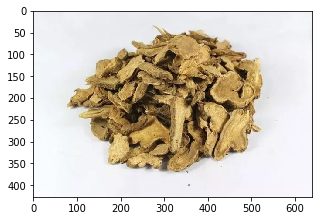

In [0]:
upload_predict()

# Visualization on the results on Training and Testing set

Below are predictions on **Testing dataset** (Testing dataset are not used in training process, thus, are utterly invinsible to our training model). We visualize the correctly predicted images as well as the wrongly predicted image

### Show the correctly predicted images

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 8.34 µs
['7', '8', '3', '7', '6', '3', '6', '2', '2', '7', '8', '2', '9', '7', '8', '6', '4', '6', '9', '2', '9', '1', '1', '4', '6', '2', '4', '9', '7', '2', '4']


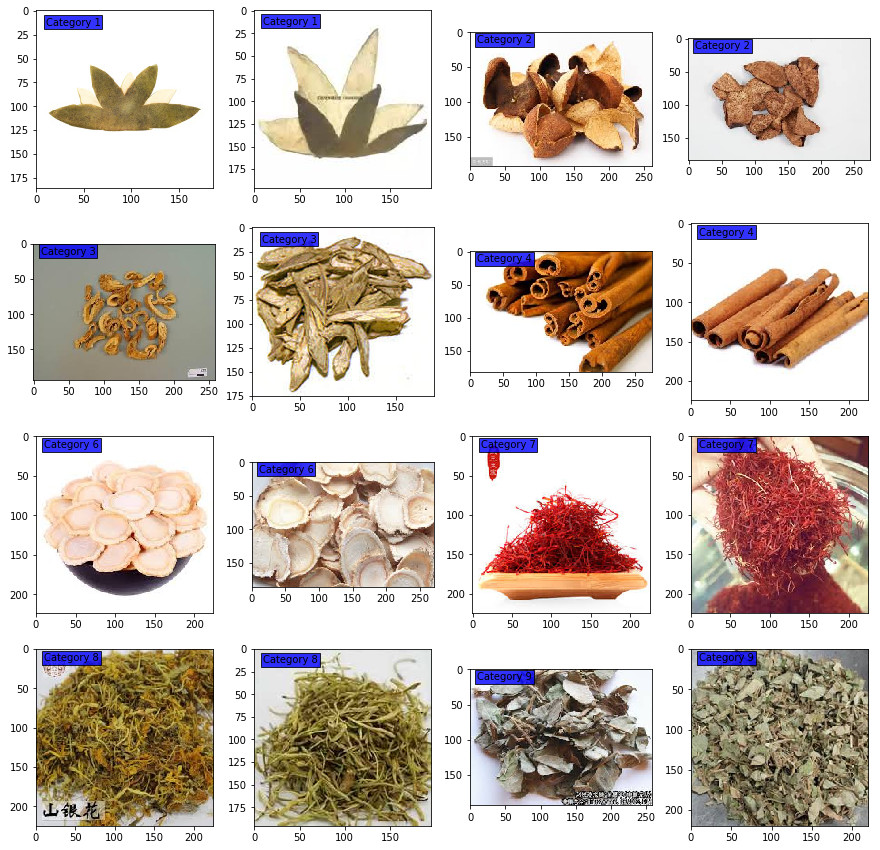

In [0]:
ShowCorrect()

### Show the wrongly predicted images

1. 肉桂 classified as 西紅花


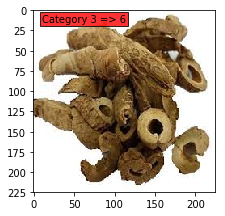

In [0]:
ShowWrong()

## For the simplicity of reading

All Function are defined below. Noticed that, to run the kernel successfully, those functions below should be declared first.

In [0]:
# mount google drive to achieve data and saved model if needed
from google.colab import drive
drive.mount('/content/drive')

In [0]:
def Setup():
  DeclareLibrary()
  LoadData()
  LoadModel()
  print("Setup Finished")

In [0]:
def DeclareLibrary():
  import efficientnet.keras as efn

  import os
  import cv2
  import matplotlib.pyplot as plt
  import pandas as pd
  import numpy as np
  import json
  from keras.models import Sequential, Model
  from keras.layers import Dense, Flatten, Activation, Dropout, GlobalAveragePooling2D
  from keras.preprocessing.image import ImageDataGenerator
  from keras import optimizers, applications
  from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
  from keras import backend as K
  from sklearn.model_selection import train_test_split
  from tensorflow.keras.models import load_model
  from keras.preprocessing import image


  # library for google colab utilities
  from google.colab import drive,files

  %matplotlib inline
  print("Library Declared")
  
def LoadModel():
  # load predefined model weight
  import efficientnet.tfkeras
  global model
  model = load_model("FinalModel.h5")
  
  global train_generator, test_generator
  global nb_classes,batch_size,img_size,nb_epochs
  
  nb_classes = len(df_train['category_id'].unique()) #9
  batch_size = 32
  img_size = 112
  nb_epochs = 50
  
  train_datagen=ImageDataGenerator(rescale=1./255, 
      validation_split=0.20,
      horizontal_flip = True,    
      zoom_range = 0.3,
      width_shift_range = 0.3,
      height_shift_range=0.3
      )

  train_generator=train_datagen.flow_from_dataframe(    
      dataframe=train,    
      directory=".",
      x_col="file_path",
      y_col="category_id",
      batch_size=batch_size,
      shuffle=True,
      class_mode="categorical",    
      target_size=(img_size,img_size))

  test_generator = test_datagen.flow_from_dataframe(      

          dataframe=test,    

          directory = ".",    
          x_col="file_path",
          target_size = (img_size,img_size),
          batch_size = 1, # originally 1
          shuffle = False,
          class_mode = None
          )
  print("Model loaded")
  
  
def LoadData():
  # generate dictionary for label name
  name_dict={}
  Category_name = ['化橘紅','陳皮','五加皮','肉桂','白朮','人參','西紅花','山銀花','金錢草']
  for i,e in enumerate(Category_name):
    name_dict[i] = e  
  # Load from dataframe
  # Read in the dataframe
  df_train = pd.read_csv('./train.csv')
  # convert id to category type
  df_train = df_train.astype({"category_id":'str'})
  # Shuffle 
  df_train_shuffle = df_train.sample(frac=1).reset_index(drop=True)
  # train test data split
  global train
  global test
  train, test = train_test_split(df_train_shuffle,test_size=0.15)
  
  print("Data loaded")

In [0]:
def predict_image(path):
  test_image = image.load_img(path,target_size=(112,112))
  batch_holder = np.zeros((1, 112, 112, 3))
  batch_holder[0,:] = test_image
  batch_holder = batch_holder /255
  
  result = model.predict(batch_holder)
  indices=np.argmax(result,axis=1)
  labels = (train_generator.class_indices)
  labels = dict((v,k) for k,v in labels.items())
  inference = [name_dict[int(labels[k])] for k in indices]
  print("Prediction Category: %s" % (inference[0]))
  
  plt.figure(figsize=[5,5])
  img = cv2.cv2.imread("%s" % path)
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  plt.imshow(img)

def ShowCorrect():
  %%time
  test_generator.reset()
  predict=model.predict_generator(test_generator, steps = len(test_generator.filenames))

  predicted_class_indices=np.argmax(predict,axis=1)
  # convert cetegory index to category
  labels = (train_generator.class_indices)
  labels = dict((v,k) for k,v in labels.items())
  predictions = [labels[k] for k in predicted_class_indices]
  
  Correct = test[test['category_id'] == predictions]
  Wrong = test[test['category_id'] != predictions]
  
  lll = Correct.sample(frac=1).groupby('category_id').head(2)
  lll = lll.sort_values('category_id')

  correct_img_names = lll['file_path']

  # show the 
  plt.figure(figsize=[15,15])
  i=0

  for img_name in correct_img_names:
    img = cv2.cv2.imread("%s" % img_name)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.subplot(4,4,(i+1))
    plt.imshow(img)
    title = ("Category %d" % (int(lll.iloc[i]['category_id'])))
    plt.text(10,15,title,bbox={'facecolor':'blue','alpha':0.8,'pad':2})
    #print(name_dict[int(Wrong.iloc[i]['category_id'])]) # correct
    #print(name_dict[false[i]]) # wrong
    #print(str(i+1)+ ". "+name_dict[int(Correct.iloc[i]['category_id'])]+ " classified as "+ name_dict[correct[i]])
    i+=1


  plt.show()
  
def ShowWrong():
  false = [int(i) for e,i in enumerate(predictions) if int(i) != int(test.iloc[e]['category_id'])]
  correct = [int(i) for e,i in enumerate(predictions) if int(i) == int(test.iloc[e]['category_id'])]
  
  wrong_img_names = Wrong['file_path']

  # show the 
  plt.figure(figsize=[15,15])
  i = 0
  for img_name in wrong_img_names:
    img = cv2.cv2.imread("%s" % img_name)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.subplot(1,4,(i+1))
    plt.imshow(img)
    title = ("Category %d => %d" % (int(Wrong.iloc[i]['category_id']), false[i]))
    plt.text(10,15,title,bbox={'facecolor':'red','alpha':0.8,'pad':2})
    #print(name_dict[int(Wrong.iloc[i]['category_id'])]) # correct
    #print(name_dict[false[i]]) # wrong
    print(str(i+1)+ ". "+name_dict[int(Wrong.iloc[i]['category_id'])]+ " classified as "+ name_dict[false[i]])
    i+=1

  plt.show()

In [0]:
!ls

data  data.zip	drive  FinalModel.h5  history.json  sample_data  train.csv


In [0]:
cp FinalModel.h5 /content/drive/My\ Drive/Colab